# Name: Srinesh Heshan

# Project: Individual Project

# Course: Machine Learning 2 

### **Predicting Churn For Bank Customers using Extream Gradient Boost and Neural Networks**




In [ ]:
#Importing Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from random import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from matplotlib import pyplot

In [ ]:
#Uploading dataset
df = pd.read_csv("Attrition_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#  Checking missing values in dataset
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Dropping columns which are not necessary for prediction
colsToDrop = ['RowNumber','CustomerId','Surname']
df = df.drop(colsToDrop, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### **Analyzing the categorical Features**

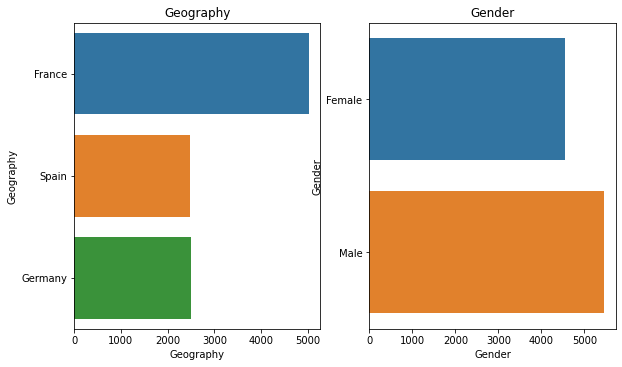

In [ ]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['Exited']))]
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

Integer encoding applying on categorical columns in the dataset

In [ ]:
#Identify the categorical columns in the dataset
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [ ]:
#Encoding the categorical values ( Integer encoding )
new_df = df.apply(LabelEncoder().fit_transform)
new_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,228,0,0,24,2,0,0,1,1,5068,1
1,217,2,0,23,1,743,0,0,1,5639,0
2,111,0,0,24,8,5793,2,1,0,5707,1
3,308,0,0,21,1,0,1,0,0,4704,0
4,459,2,0,25,2,3696,0,1,1,3925,0


In [ ]:
#Randomization of the dataset
np.random.seed(1000)

**Correlation matrix**

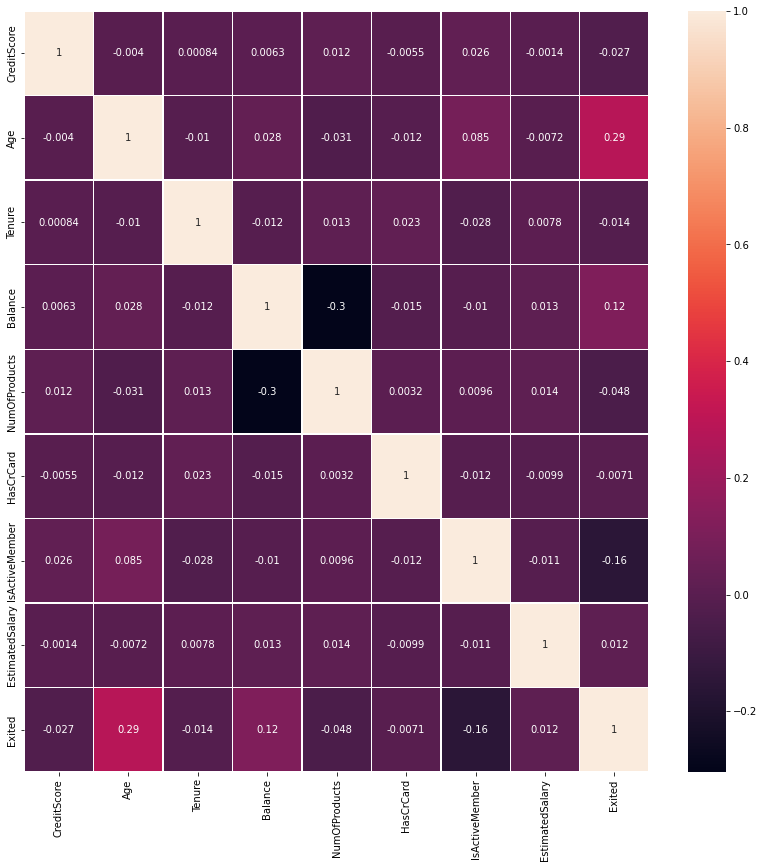

In [ ]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)

# **Analyzing the target varible**

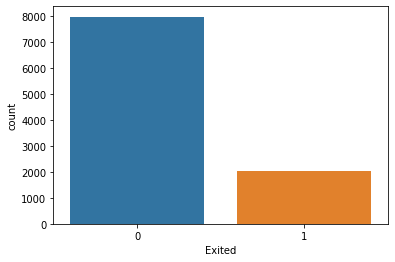

Exited
0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
# Churned or Not
sns.countplot(x='Exited',data=df)
plt.show()
df['Exited'].groupby(df['Exited']).count()

## Seems like need to handle unblance data first before moving further unless machine learning models that going to be predicting mostly the majority class that is 0 Non-Churned. In the next steps I will be handling the scenario by using Synthetic Minority Oversampling Technique available with imbalanced-Learn Library


*more Information about smote can be found here: https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/*

Before handling the imbalance data I am applying data normalization, performing data splitting and feature importance analysis procedures.

In [ ]:
#Randomization of the dataset
np.random.seed(1000)

In [ ]:
# Seperating the Features and Target Columns 
df_feat = new_df[new_df.columns[0:-1]] # Feature columns 
df_head = new_df[new_df.columns[len(new_df.columns)-1]]  # Target variable 

# Data Normalization

In [ ]:
# Feature Scalling using Sklearn StandardScaler function
scaler = StandardScaler()
StandardScaler(copy=True,with_mean=True,with_std=True)
scaler.fit(df_feat)
scaled_features = scaler.transform(df_feat)
df_scaled = pd.DataFrame(scaled_features,columns=df_feat.columns)
df_scaled.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.327331,-0.901886,-1.095988,0.293793,-1.041760,-0.958432,-0.911583,0.646092,0.970243,0.024035
1,-0.441331,1.515067,-1.095988,0.198387,-1.387538,-0.608805,-0.911583,-1.547768,0.970243,0.221848
2,-1.539876,-0.901886,-1.095988,0.293793,1.032908,1.767524,2.527057,0.646092,-1.030670,0.245405
3,0.501759,-0.901886,-1.095988,0.007575,-1.387538,-0.958432,0.807737,-1.547768,-1.030670,-0.102066
4,2.066668,1.515067,-1.095988,0.389199,-1.041760,0.780759,-0.911583,0.646092,0.970243,-0.371937


**Feature Importance Analysis**

I am going to perform the feature importance analysis using the XGBClassifier and grab the important features for the next steps.

Feature: 0, Score: 0.02343
Feature: 1, Score: 0.08445
Feature: 2, Score: 0.08224
Feature: 3, Score: 0.23433
Feature: 4, Score: 0.02241
Feature: 5, Score: 0.05912
Feature: 6, Score: 0.21201
Feature: 7, Score: 0.01854
Feature: 8, Score: 0.24074
Feature: 9, Score: 0.02272


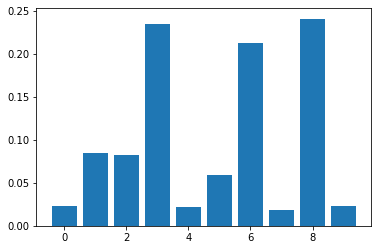

In [ ]:
##Feature Selection using XGBClassifier
model = XGBClassifier()
# fit the model
model.fit(df_scaled,df_head)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

All the features above the score 0.05 will be taken from the dataset.

In [ ]:
## Feeding only selected features

df_filtered = df_scaled.loc[:, ["Geography","Gender","Age","Balance","NumOfProducts","IsActiveMember"]]
df_filtered.head()

,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,-0.901886,-1.095988,0.293793,-0.958432,-0.911583,0.970243
1,1.515067,-1.095988,0.198387,-0.608805,-0.911583,0.970243
2,-0.901886,-1.095988,0.293793,1.767524,2.527057,-1.030670
3,-0.901886,-1.095988,0.007575,-0.958432,0.807737,-1.030670
4,1.515067,-1.095988,0.389199,0.780759,-0.911583,0.970243


Split Dataset into Training and Test sets (80% & 20%)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_filtered, df_head, test_size=0.20, random_state=1)

**Now let's handle the imbalance data problem**

### Installing imblearn library here 

In [ ]:
pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train,y_train)
#X_train_smote, Y_train_smote = smote.fit_resample(X_test,y_test)

Let's check what kind of impact happened to the data

In [ ]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(Y_train_smote))

Before SMOTE: Counter({0: 6378, 1: 1622})
After SMOTE: Counter({0: 6378, 1: 6378})


As far now I have solved the imbalanced data problem with SMOTE.

# Using XGBClassifier as the first model here

In [ ]:
#Hyperparameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
# Declairing the default classifier
classifier=xgboost.XGBClassifier()

In [ ]:
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X_train_smote,Y_train_smote)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=15,
              min_child_weight=3)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.1,
 'learning_rate': 0.15,
 'max_depth': 15,
 'min_child_weight': 3}

In [ ]:
classifier=xgboost.XGBClassifier(n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
classifier.fit(X_train_smote,Y_train_smote)

XGBClassifier(n_iter=5, n_jobs=-1,
              param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                                   'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                   'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25,
                                                     0.3],
                                   'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
                                   'min_child_weight': [1, 3, 5, 7]},
              scoring='roc_auc', verbose=3)

In [ ]:
x_train_smote_pred = classifier.predict(X_train_smote)

In [ ]:
x_test_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#Test Accuracy
test_acc = accuracy_score(y_test,x_test_pred)



In [ ]:
test_acc

0.8125

In [ ]:
#Train Accuracy
train_acc = accuracy_score(Y_train_smote,x_train_smote_pred)
print(train_acc)

0.8203982439636249


# Now neural network implementation:

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

In [ ]:
# Defining few parameters 
num_layers = 3
min_nodes_per_layer, max_nodes_per_layer = 64, 256
node_step_size = 64

In [ ]:
import itertools
node_options = list(range(
    min_nodes_per_layer, 
    max_nodes_per_layer + 1, 
    node_step_size
))
node_options

two_layer_possibilities = [node_options, node_options]
two_layer_possibilities
list(itertools.product(*two_layer_possibilities))


layer_possibilities = [node_options] * num_layers
layer_possibilities



layer_node_permutations = list(itertools.product(*layer_possibilities))
layer_node_permutations




[(64, 64, 64),
 (64, 64, 128),
 (64, 64, 192),
 (64, 64, 256),
 (64, 128, 64),
 (64, 128, 128),
 (64, 128, 192),
 (64, 128, 256),
 (64, 192, 64),
 (64, 192, 128),
 (64, 192, 192),
 (64, 192, 256),
 (64, 256, 64),
 (64, 256, 128),
 (64, 256, 192),
 (64, 256, 256),
 (128, 64, 64),
 (128, 64, 128),
 (128, 64, 192),
 (128, 64, 256),
 (128, 128, 64),
 (128, 128, 128),
 (128, 128, 192),
 (128, 128, 256),
 (128, 192, 64),
 (128, 192, 128),
 (128, 192, 192),
 (128, 192, 256),
 (128, 256, 64),
 (128, 256, 128),
 (128, 256, 192),
 (128, 256, 256),
 (192, 64, 64),
 (192, 64, 128),
 (192, 64, 192),
 (192, 64, 256),
 (192, 128, 64),
 (192, 128, 128),
 (192, 128, 192),
 (192, 128, 256),
 (192, 192, 64),
 (192, 192, 128),
 (192, 192, 192),
 (192, 192, 256),
 (192, 256, 64),
 (192, 256, 128),
 (192, 256, 192),
 (192, 256, 256),
 (256, 64, 64),
 (256, 64, 128),
 (256, 64, 192),
 (256, 64, 256),
 (256, 128, 64),
 (256, 128, 128),
 (256, 128, 192),
 (256, 128, 256),
 (256, 192, 64),
 (256, 192, 128),
 (2

In [ ]:
for permutation in layer_node_permutations[:2]:
    for nodes_at_layer in permutation:
        print(nodes_at_layer)
    print()



64
64
64

64
64
128



In [ ]:
models = []

for permutation in layer_node_permutations:
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(6,)))
    model_name = ''
    
    for nodes_at_layer in permutation:
        model.add(tf.keras.layers.Dense(nodes_at_layer, activation='relu'))
        model_name += f'dense{nodes_at_layer}_'
        
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model._name = model_name[:-1]
    
    models.append(model)



In [ ]:
models[0].summary()

Model: "dense64_dense64_dense64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def get_models(num_layers: int,
               min_nodes_per_layer: int,
               max_nodes_per_layer: int,
               node_step_size: int,
               input_shape: tuple,
               hidden_layer_activation: str = 'relu',
               num_nodes_at_output: int = 1,
               output_layer_activation: str = 'sigmoid') -> list:
    
    node_options = list(range(min_nodes_per_layer, max_nodes_per_layer + 1, node_step_size))
    layer_possibilities = [node_options] * num_layers
    layer_node_permutations = list(itertools.product(*layer_possibilities))
    
    models = []
    for permutation in layer_node_permutations:
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
        model_name = ''

        for nodes_at_layer in permutation:
            model.add(tf.keras.layers.Dense(nodes_at_layer, activation=hidden_layer_activation))
            model_name += f'dense{nodes_at_layer}_'

        model.add(tf.keras.layers.Dense(num_nodes_at_output, activation=output_layer_activation))
        model._name = model_name[:-1]
        models.append(model)
        
    return models



In [ ]:
all_models = get_models(
    num_layers=3, 
    min_nodes_per_layer=64, 
    max_nodes_per_layer=256, 
    node_step_size=64, 
    input_shape=(12,)
)



In [ ]:
print(f'#Models = {len(all_models)}')
print()

for model in all_models:
    print(model.name)



#Models = 64

dense64_dense64_dense64
dense64_dense64_dense128
dense64_dense64_dense192
dense64_dense64_dense256
dense64_dense128_dense64
dense64_dense128_dense128
dense64_dense128_dense192
dense64_dense128_dense256
dense64_dense192_dense64
dense64_dense192_dense128
dense64_dense192_dense192
dense64_dense192_dense256
dense64_dense256_dense64
dense64_dense256_dense128
dense64_dense256_dense192
dense64_dense256_dense256
dense128_dense64_dense64
dense128_dense64_dense128
dense128_dense64_dense192
dense128_dense64_dense256
dense128_dense128_dense64
dense128_dense128_dense128
dense128_dense128_dense192
dense128_dense128_dense256
dense128_dense192_dense64
dense128_dense192_dense128
dense128_dense192_dense192
dense128_dense192_dense256
dense128_dense256_dense64
dense128_dense256_dense128
dense128_dense256_dense192
dense128_dense256_dense256
dense192_dense64_dense64
dense192_dense64_dense128
dense192_dense64_dense192
dense192_dense64_dense256
dense192_dense128_dense64
dense192_dense128_dense12

In [ ]:
def optimize(models: list,
             X_train: np.array,
             y_train: np.array,
             X_test: np.array,
             y_test: np.array,
             epochs: int = 50,
             verbose: int = 0) -> pd.DataFrame:
    
    # We'll store the results here
    results = []
    
    def train(model: tf.keras.Sequential) -> dict:
        # Change this however you want
        model.compile(
            loss=tf.keras.losses.binary_crossentropy,
            optimizer=tf.keras.optimizers.Adam(),
            metrics=[
                tf.keras.metrics.BinaryAccuracy(name='accuracy')
            ]
        )
        
        # Train the model
        model.fit(
            X_train_smote,
            Y_train_smote,
            epochs=epochs,
            verbose=verbose
        )
        
        # Make predictions on the test set
        preds = model.predict(X_test)
        prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(preds)]
        
        # Return evaluation metrics on the test set
        return {
            'model_name': model.name,
            'test_accuracy': accuracy_score(y_test, prediction_classes),
            'test_precision': precision_score(y_test, prediction_classes),
            'test_recall': recall_score(y_test, prediction_classes),
            'test_f1': f1_score(y_test, prediction_classes)
        }
    
    # Train every model and save results
    for model in models:
        try:
            print(model.name, end=' ... ')
            res = train(model=model)
            results.append(res)
        except Exception as e:
            print(f'{model.name} --> {str(e)}')
        
    return pd.DataFrame(results)

In [ ]:
optimization_results = optimize(
    models=models,
    X_train=X_train_smote,
    y_train=Y_train_smote,
    X_test=X_test,
    y_test=y_test
)

dense64_dense64_dense64 ... dense64_dense64_dense128 ... dense64_dense64_dense192 ... dense64_dense64_dense256 ... dense64_dense128_dense64 ... dense64_dense128_dense128 ... dense64_dense128_dense192 ... dense64_dense128_dense256 ... dense64_dense192_dense64 ... dense64_dense192_dense128 ... dense64_dense192_dense192 ... dense64_dense192_dense256 ... dense64_dense256_dense64 ... dense64_dense256_dense128 ... dense64_dense256_dense192 ... dense64_dense256_dense256 ... dense128_dense64_dense64 ... dense128_dense64_dense128 ... dense128_dense64_dense192 ... dense128_dense64_dense256 ... dense128_dense128_dense64 ... dense128_dense128_dense128 ... dense128_dense128_dense192 ... dense128_dense128_dense256 ... dense128_dense192_dense64 ... dense128_dense192_dense128 ... dense128_dense192_dense192 ... dense128_dense192_dense256 ... dense128_dense256_dense64 ... dense128_dense256_dense128 ... dense128_dense256_dense192 ... dense128_dense256_dense256 ... dense192_dense64_dense64 ... dense192_de

In [ ]:
optimization_results.sort_values(by='test_accuracy', ascending=False)

,model_name,test_accuracy,test_precision,test_recall,test_f1
1,dense64_dense64_dense128,0.8130,0.537341,0.710843,0.612033
59,dense256_dense192_dense256,0.8120,0.535262,0.713253,0.611570
23,dense128_dense128_dense256,0.8120,0.535135,0.715663,0.612371
3,dense64_dense64_dense256,0.8115,0.533688,0.725301,0.614913
57,dense256_dense192_dense128,0.8090,0.530726,0.686747,0.598739
...,...,...,...,...,...
16,dense128_dense64_dense64,0.7950,0.504160,0.730120,0.596457
13,dense64_dense256_dense128,0.7945,0.503472,0.698795,0.585267
62,dense256_dense256_dense192,0.7940,0.502618,0.693976,0.582996
47,dense192_dense256_dense256,0.7925,0.500000,0.708434,0.586241


# Benchmark Model

In [ ]:
# Here I i have chosen Random Forest Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_Model = RandomForestClassifier()
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomGrid.fit(X_train_smote,Y_train_smote)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [ ]:
rf_RandomGrid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
print (f'Train Accuracy - : {rf_RandomGrid.score(X_train_smote,Y_train_smote):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.760
Test Accuracy - : 0.787


### Now Let's use new python library called EvalML to find which algorithm and it's parameters are better for this prediction ###

In [ ]:
pip install evalml


In [ ]:
import evalml
from evalml import AutoMLSearch
automl=AutoMLSearch(X_train=X_train,y_train=y_train,problem_type='binary',max_batches=1,optimize_thresholds=True)
automl.search()
automl.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,3,XGBoost Classifier w/ Label Encoder + Imputer,3,0.349049,0.007440,0.349049,95.015531,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,6,Random Forest Classifier w/ Label Encoder + Im...,6,0.355488,0.009325,0.355488,94.923584,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,4,LightGBM Classifier w/ Label Encoder + Imputer,4,0.360270,0.008034,0.360270,94.855290,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,8,Extra Trees Classifier w/ Label Encoder + Imputer,8,0.379797,0.005566,0.379797,94.576453,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,1,Elastic Net Classifier w/ Label Encoder + Impu...,1,0.438657,0.008480,0.438657,93.735914,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,2,Logistic Regression Classifier w/ Label Encode...,2,0.438657,0.008482,0.438657,93.735913,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,7,Decision Tree Classifier w/ Label Encoder + Im...,7,0.550178,0.077910,0.550178,92.143390,False,"{'Label Encoder': {'positive_label': None}, 'I..."
7,5,CatBoost Classifier w/ Label Encoder + Imputer,5,0.573928,0.000547,0.573928,91.804237,False,"{'Label Encoder': {'positive_label': None}, 'I..."
8,0,Mode Baseline Binary Classification Pipeline,0,7.002736,0.005962,7.002736,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


###Finding the best pipeline

In [ ]:
best_pipeline = automl.best_pipeline
best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'XGBoost Classifier': ['XGBoost Classifier', 'Imputer.x', 'Label Encoder.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'XGBoost Classifier':{'eta': 0.1, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'n_jobs': -1, 'eval_metric': 'logloss'}}, random_seed=0)

### Best parameters

In [ ]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


*************************************************
* XGBoost Classifier w/ Label Encoder + Imputer *
*************************************************

Problem Type: binary
Model Family: XGBoost

Pipeline Steps
1. Label Encoder
	 * positive_label : None
2. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
3. XGBoost Classifier
	 * eta : 0.1
	 * max_depth : 6
	 * min_child_weight : 1
	 * n_estimators : 100
	 * n_jobs : -1
	 * eval_metric : logloss

Training
Training for binary problems.
Total training time (including CV): 3.1 seconds

Cross Validation
----------------
             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.353       0.538 0.703 0.851      0.687 0.619                     0.749            0.859      5,333        2,667
1                      0.341       0.531 0.714 

### Accuracy

In [ ]:
scores = best_pipeline.score(X_test, y_test,  objectives=evalml.objectives.get_core_objectives('binary'))
print(f'Accuracy : {scores["Accuracy Binary"]}')

Accuracy : 0.8525
